In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
data_dir = r'Data\SOCOFing\Real'

# Hàm để tải và xử lý hình ảnh


def load_images(data_dir):
    images = []
    labels = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.BMP'):
            # print(file_name)
            # print(file_name.split('__')[0])
            # print(os.path.join(data_dir, file_name))
            img = cv2.imread(os.path.join(
                data_dir, file_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (96, 96))
            images.append(img)
            label = int(file_name.split('__')[0])
            labels.append(label)
    return np.array(images), np.array(labels)

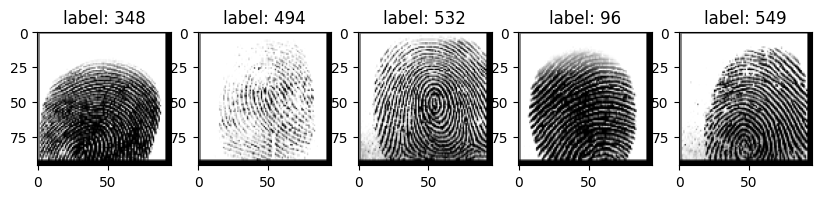

In [3]:
def display_sample_images(images, labels, number_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(number_samples):
        index = np.random.randint(0, len(images))
        img = images[index]
        label = labels[index]
        plt.subplot(1, number_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"label: {label}")
        plt.axis()
    plt.show()


images, labels = load_images(data_dir)
display_sample_images(images, labels)

In [6]:
data_paths = [
    "Data\\SOCOFing\\Altered\\Altered-Easy",
    "Data\\SOCOFing\\Altered\\Altered-Hard",
    "Data\\SOCOFing\\Altered\\Altered-Medium",
    "Data\\SOCOFing\\Real"
]
def load_data(data_paths):
    images = []
    labels = []
    for label, path in enumerate(data_paths):
        for file in os.listdir(path):
            if file.endswith(".BMP"):
                img_path = os.path.join(path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (96, 96))  # Resize ảnh về kích thước 96x96
                images.append(img)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [7]:
# Tải dữ liệu
images, labels = load_data(data_paths)
images = images / 255.0  # Chuẩn hóa giá trị ảnh về khoảng [0, 1]

In [10]:
# Chuyển đổi labels sang dạng one-hot encoding
labels = to_categorical(labels, num_classes=len(data_paths))

In [11]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [12]:
# Thêm chiều cho ảnh để phù hợp với input của CNN (96, 96, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [13]:
# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(data_paths), activation='softmax')
])

d:\Project\Th-c-t-p-t-t-nghi-p\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Huấn luyện mô hình với verbose=1
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 192s 137ms/step - accuracy: 0.4910 - loss: 1.0509 - val_accuracy: 0.7105 - val_loss: 0.6382
Epoch 2/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 178s 128ms/step - accuracy: 0.7455 - loss: 0.5591 - val_accuracy: 0.7943 - val_loss: 0.4583
Epoch 3/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 175s 127ms/step - accuracy: 0.7985 - loss: 0.4237 - val_accuracy: 0.8121 - val_loss: 0.4062
Epoch 4/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 175s 126ms/step - accuracy: 0.8256 - loss: 0.3637 - val_accuracy: 0.8174 - val_loss: 0.4048
Epoch 5/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 173s 125ms/step - accuracy: 0.8428 - loss: 0.3262 - val_accuracy: 0.8228 - val_loss: 0.3722
Epoch 6/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 174s 126ms/step - accuracy: 0.8607 - loss: 0.2887 - val_accuracy: 0.8087 - val_loss: 0.4210
Epoch 7/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 165s 120ms/step - accuracy: 0.8668 - loss: 0.2728 - val_accuracy: 0.8227 - val_loss: 0.3763
Epoch 8/10
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 169s 122ms/step - ac

In [17]:
# Đánh giá mô hình
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

346/346 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.8170 - loss: 0.4342
Test accuracy: 0.8129184246063232


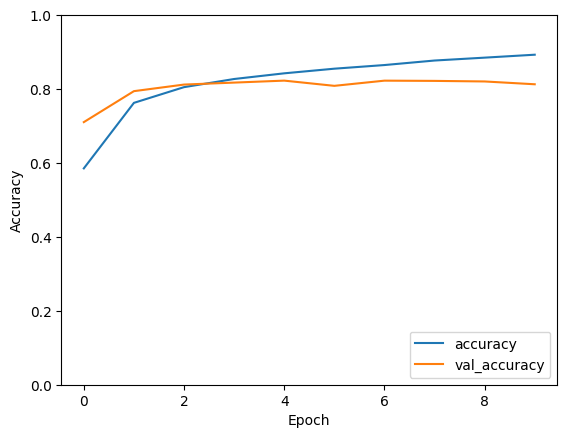

: 

In [18]:
# Hiển thị lịch sử huấn luyện
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()